### Support Vector Classifier Task

#### 심장마비 가능성 예측


#### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

#### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [1]:
import pandas as pd

h_df = pd.read_csv("./datasets/heart.csv")
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
h_df.duplicated().sum()

1

In [4]:
h_df.drop_duplicates(inplace=True)

In [5]:
h_df.duplicated().sum()

0

In [6]:
h_df.reset_index(drop=True, inplace=True)

In [7]:
h_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

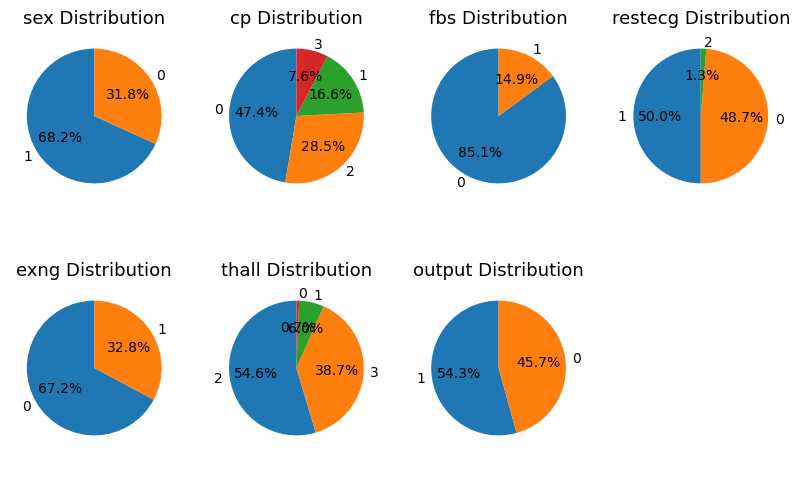

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(10, 6))

axes = axes.flatten()

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'thall', 'output']

for i in range(7):
    column = categorical_columns[i]
    value_dict = dict(h_df[column].value_counts())
    labels = list(value_dict.keys())
    values = list(value_dict.values())
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{column} Distribution', fontsize=13)
axes[-1].axis('off')
plt.show()

In [9]:
import seaborn as sns

corr = h_df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [10]:
corr['output'].sort_values(ascending=False)[1:]

cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

<Axes: >

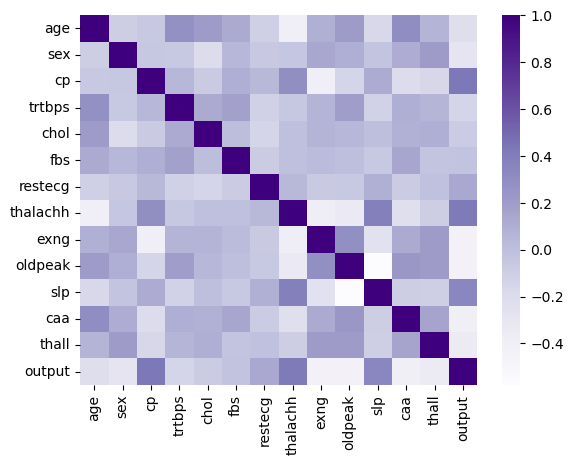

In [11]:
sns.heatmap(corr, cmap="Purples")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

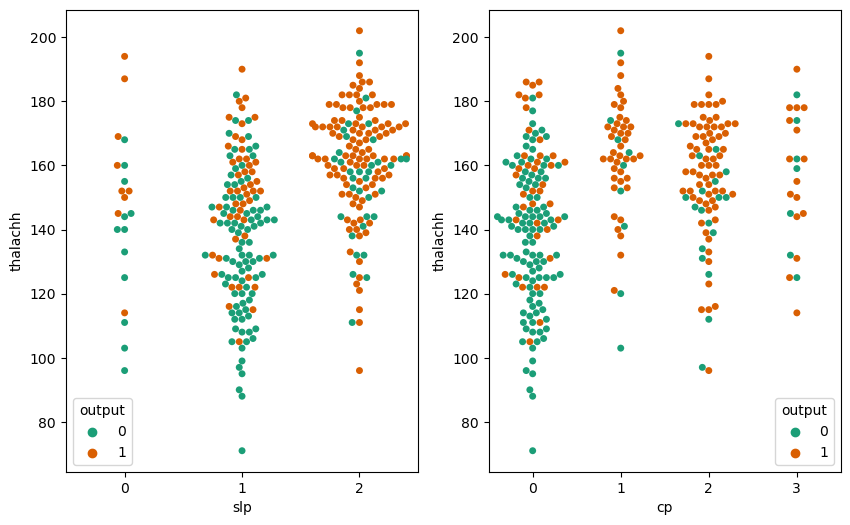

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.swarmplot(x='slp', y='thalachh', hue='output', palette='Dark2', data=h_df, ax=ax1)
sns.swarmplot(x='cp', y='thalachh', hue='output', palette='Dark2', data=h_df, ax=ax2)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

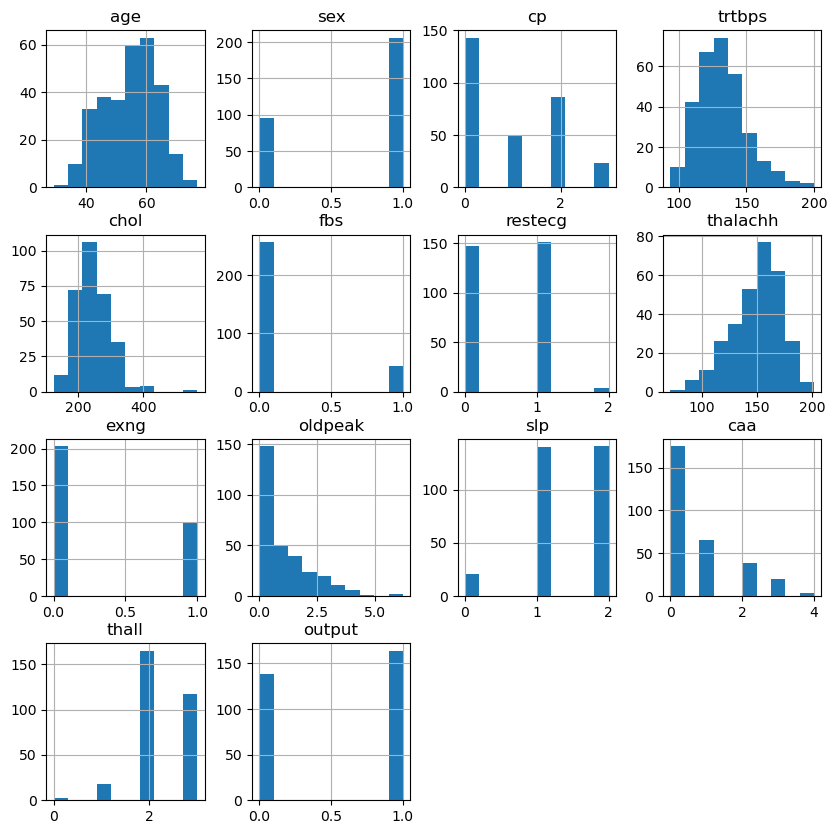

In [14]:
h_df.hist(figsize=(10, 10))
plt.show()

In [15]:
h_df.output.value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [16]:
sampled_ones = h_df[h_df['output'] == 1].sample(n=138, random_state=124)
zeros = h_df[h_df['output'] == 0]
sampled_df = pd.concat([sampled_ones, zeros]).reset_index(drop=True)
sampled_df['output'].value_counts()

output
1    138
0    138
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

features = sampled_df.iloc[:, :-1]

std = StandardScaler()
std_features = std.fit_transform(features)
std_under_h_df = pd.DataFrame(std_features, columns=features.columns)
std_under_h_df['output'] = sampled_df['output']
std_under_h_df.shape

(276, 14)

In [18]:
columns = ['thalachh', 'oldpeak', 'slp']

for column in columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 13건
oldpeak: 17건
slp: 20건


In [19]:
columns = ['thalachh', 'oldpeak', 'slp']

for column in columns:
    std_under_h_df.drop(std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, axis=0, inplace=True)

In [20]:
columns = ['thalachh', 'oldpeak', 'slp']

for column in columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 0건
oldpeak: 0건
slp: 0건


In [21]:
sampled_df = sampled_df.iloc[std_under_h_df.index].reset_index(drop=True)
sampled_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
233,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
234,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
235,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


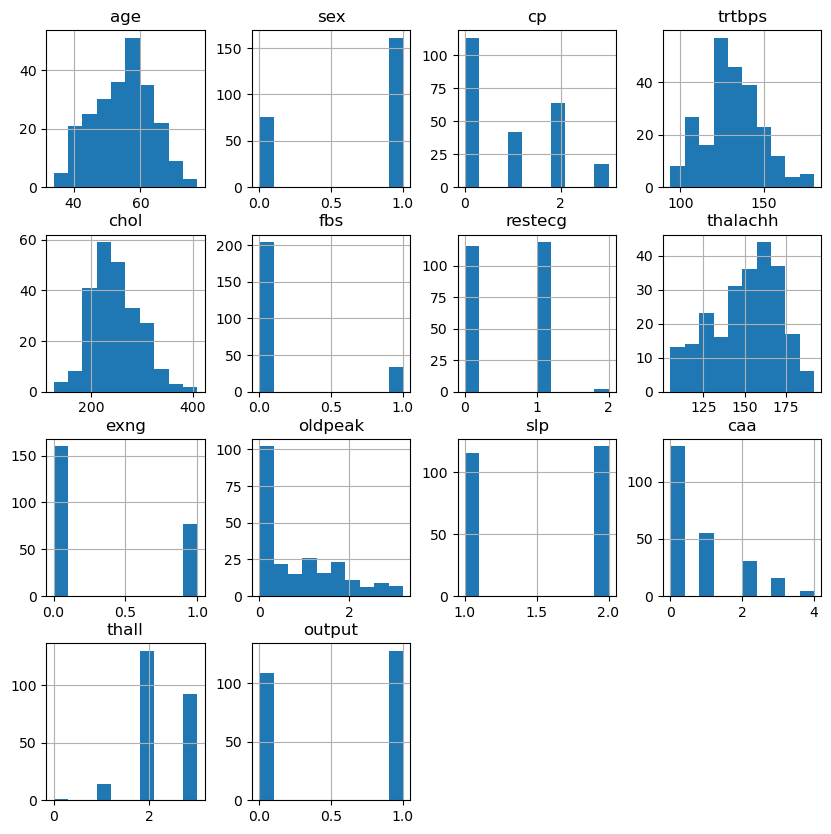

In [22]:
sampled_df.hist(figsize=(10, 10))
plt.show()

In [23]:
sampled_df.output.value_counts()

output
1    128
0    109
Name: count, dtype: int64

In [24]:
sampled_ones = sampled_df[sampled_df['output'] == 1].sample(n=109, random_state=124)
zeros = sampled_df[sampled_df['output'] == 0]
sampled_df = pd.concat([sampled_ones, zeros]).reset_index(drop=True)
sampled_df['output'].value_counts()

output
1    109
0    109
Name: count, dtype: int64

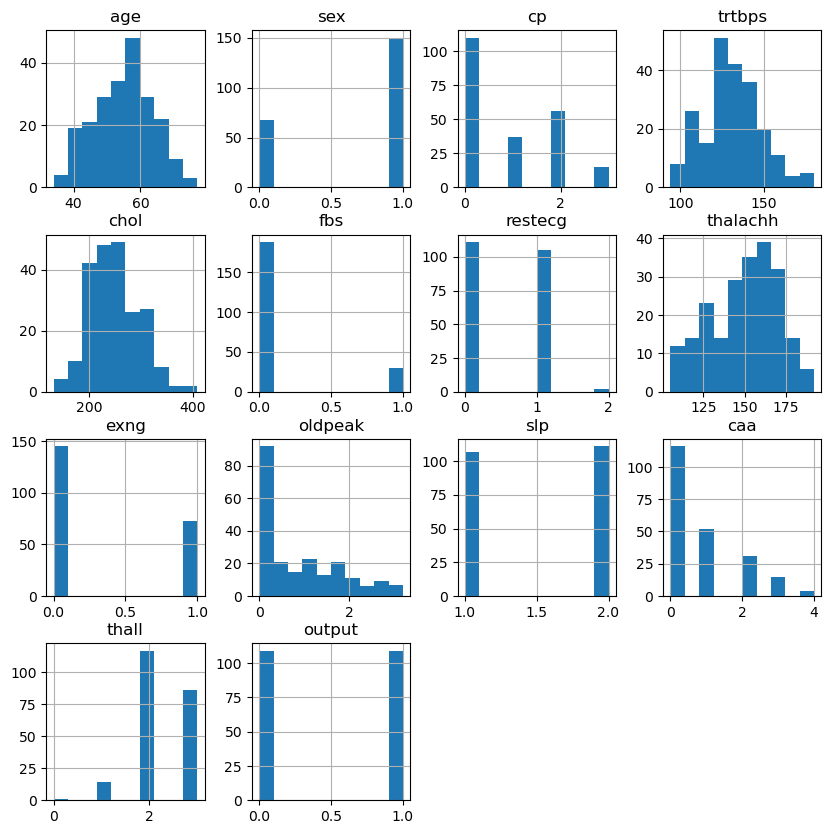

In [25]:
sampled_df.hist(figsize=(10, 10))
plt.show()

In [26]:
oldpeak0 = sampled_df[sampled_df.oldpeak == 0].sample(12, random_state=124)
oldpeak = sampled_df[sampled_df.oldpeak != 0]
sampled_df = pd.concat([oldpeak, oldpeak0]).reset_index(drop=True)
sampled_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
1,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
2,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
4,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
152,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
153,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
154,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0


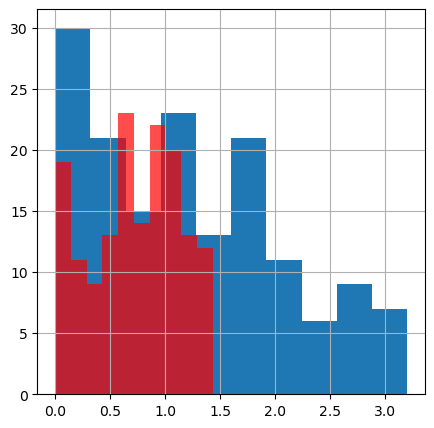

In [27]:
import numpy as np

sampled_df.oldpeak.hist(figsize=(5, 5))
np.log1p(sampled_df.oldpeak).hist(figsize=(5, 5), alpha=0.7, color="red")
plt.show()

In [28]:
sampled_df.oldpeak = np.log1p(sampled_df.oldpeak)
sampled_df.thalachh = np.log1p(sampled_df.thalachh)
sampled_df.chol = np.log1p(sampled_df.chol)

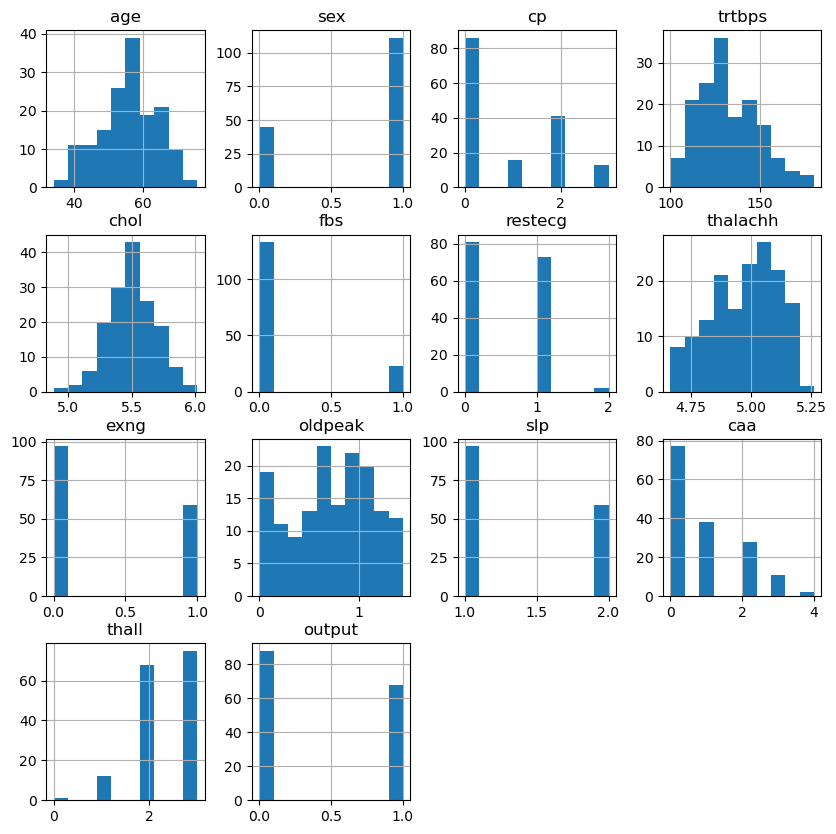

In [29]:
sampled_df.hist(figsize=(10, 10))
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = sampled_df.iloc[:, :-1], sampled_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 파이프라인으로 구축한 각 파이프의 이름을 먼저 작성하고, (_)언더바를 두 번(__) 작성한 뒤 파라미터 이름을 작성한다.
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

# 2. GridSearchCV
g_svc = GridSearchCV(svc, param_grid=parameters, cv=5, refit=True, return_train_score=True)

# 3. 훈련
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [31]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.548667,67
1,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.564667,42
2,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.548667,67
3,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.564667,42
4,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.548667,67
...,...,...,...
67,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.580667,40
68,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",0.807000,19
69,"{'C': 100, 'gamma': 10, 'kernel': 'rbf'}",0.564667,42
70,"{'C': 100, 'gamma': 100, 'kernel': 'linear'}",0.807000,19


In [32]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[15  3]
 [ 1 13]]
정확도: 0.8750, 정밀도: 0.8125, 재현율: 0.9286, F1: 0.8667, ROC-AUC: 0.8810
################################################################################


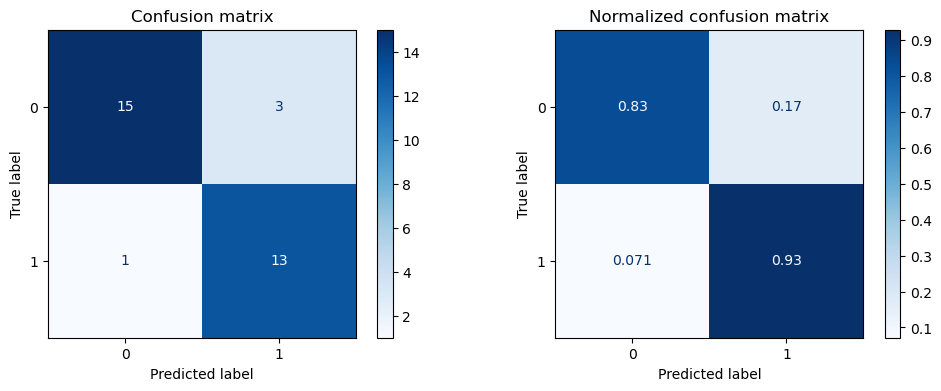

In [34]:
get_evaluation(y_test, prediction, svc, X_test)

In [35]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = sampled_df.iloc[:, :-1], sampled_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 파이프라인으로 구축한 각 파이프의 이름을 먼저 작성하고, (_)언더바를 두 번(__) 작성한 뒤 파라미터 이름을 작성한다.
parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

# 1. 파이프라인 구축
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 2. GridSearchCV
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 3. 훈련
g_svc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [36]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.564460,42
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.564460,42
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.564460,42
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.564460,42
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.564460,42
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.588657,40
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.782424,26
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.564460,42
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.782424,26


In [37]:
result_df[result_df['rank_test_score'] == 1]

,params,mean_test_score,rank_test_score
24,"{'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...",0.846496,1
26,"{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...",0.846496,1
28,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.846496,1
30,"{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...",0.846496,1
32,"{'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...",0.846496,1
34,"{'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...",0.846496,1


In [38]:
print(result_df['params'][29])

{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [39]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[13  5]
 [ 0 14]]
정확도: 0.8438, 정밀도: 0.7368, 재현율: 1.0000, F1: 0.8485, ROC-AUC: 0.8611
################################################################################


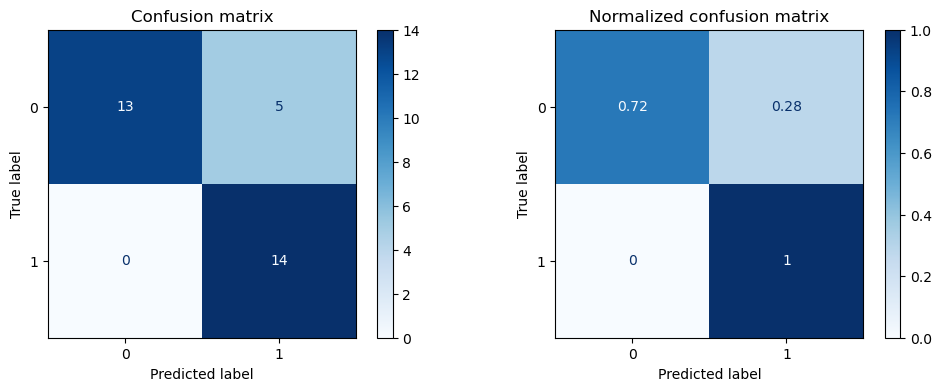

In [41]:
get_evaluation(y_test, prediction, svc, X_test)

In [42]:
svc.predict_proba(X_test).tolist()

[[0.5, 0.5],
 [0.9606077064187617, 0.039392293581238386],
 [0.11427035185994003, 0.8857296481400599],
 [0.9642814510957674, 0.03571854890423272],
 [0.2884184973235659, 0.7115815026764342],
 [0.15066720928214564, 0.8493327907178546],
 [0.16171513158295212, 0.8382848684170476],
 [0.09283764367734088, 0.907162356322659],
 [0.02300720887010196, 0.976992791129898],
 [0.7940614106947077, 0.20593858930529227],
 [0.9028333547306409, 0.09716664526935895],
 [0.4535435194116364, 0.5464564805883634],
 [0.11981131039215423, 0.8801886896078458],
 [0.02121302006099733, 0.9787869799390029],
 [0.9951804086654471, 0.004819591334552814],
 [0.4329913196072902, 0.5670086803927099],
 [0.9405342844012824, 0.05946571559871764],
 [0.529877094551629, 0.4701229054483708],
 [0.042746321116256404, 0.9572536788837436],
 [0.9535727401581554, 0.04642725984184453],
 [0.2191604525593473, 0.7808395474406528],
 [0.06416766465859479, 0.9358323353414054],
 [0.20672743371934285, 0.7932725662806572],
 [0.3117256240448095, 0.

#### 결론
feature별 데이터 분포를 조정했다면, 다시 표준화 진행 시 패턴의 방향성을 잃게 되어 성능이 더 떨어질 수 있다.  
**따라서 스케일링이 항상 옳은 것만은 아니다.**

In [43]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(svc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([10,  1, 12, 11,  9,  5,  3,  4,  7,  2,  0,  8,  6], dtype=int64)

In [45]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

slp: 0.0844
sex: 0.0646
thall: 0.0635
caa: 0.0552
oldpeak: 0.0375
fbs: 0.0292
trtbps: 0.0188
chol: 0.0094
thalachh: 0.0073
cp: 0.0031
age: 0.0
exng: -0.001
restecg: -0.0125
